Análise do perfil dos candidatos do enem

Importando as Bibliotecas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Abrindo dataset

In [7]:
lista_colunas_selecionadas = ['TP_COR_RACA', 'SG_UF_RESIDENCIA', 'TP_ESCOLA', 'Q002', 'Q006', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT']


df = pd.read_csv(r"C:\Users\guilh\Projetos\BigData - Treinamento Semantix\Projeto_semantix_ENEM2019\enem_dados\microdados_enem_2019\DADOS\MICRODADOS_ENEM_2019.csv", sep = ';', encoding = 'latin-1', usecols = lista_colunas_selecionadas)

In [95]:
dic_renda_media = {
'A':'Nenhuma renda.',
'B':'Até R$ 998,00.',
'C':'De R$ 998,01 até R$ 1.497,00.',
'D':'De R$ 1.497,01 até R$ 1.996,00.',
'E':'De R$ 1.996,01 até R$ 2.495,00.',
'F':'De R$ 2.495,01 até R$ 2.994,00.',
'G':'De R$ 2.994,01 até R$ 3.992,00.',
'H':'De R$ 3.992,01 até R$ 4.990,00.',
'I':'De R$ 4.990,01 até R$ 5.988,00.',
'J':'De R$ 5.988,01 até R$ 6.986,00.',
'K':'De R$ 6.986,01 até R$ 7.984,00.',
'L':'De R$ 7.984,01 até R$ 8.982,00.',
'M':'De R$ 8.982,01 até R$ 9.980,00.',
'N':'De R$ 9.980,01 até R$ 11.976,00.',
'O':'De R$ 11.976,01 até R$ 14.970,00.',
'P':'De R$ 14.970,01 até R$ 19.960,00.',
'Q':'Mais de R$ 19.960,00.'
}

dic_tp_escola_media = {1: 'Não Respondeu',
                       2: 'Pública',
                       3: 'Privada'    
                        }

dic_cor_raca = {
    0:'Não declarado',
    1:'Branca',
    2:'Preta',
    3:'Parda',
    4: 'Amarela',
    5:'Indígena'
}


Nome das colunas:

In [9]:
df.columns.values

array(['SG_UF_RESIDENCIA', 'TP_COR_RACA', 'TP_ESCOLA', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
       'Q002', 'Q006'], dtype=object)

Excluindo variáveis nulas:

In [11]:
df_selecionada_sem_nulos = df.dropna(axis=0)
print('Quantidade de variáveis excluídas: {}'.format(len(df) - len(df_selecionada_sem_nulos)))
print('Porcentagem de variáveis excluídas: {:.2f}%'.format((len(df)-len(df_selecionada_sem_nulos))/len(df)*100))

Quantidade de variáveis excluídas: 1393263
Porcentagem de variáveis excluídas: 27.34%


Podemos comparar as notas obtidas com certas variáveis

In [20]:
df_renda_media = df_selecionada_sem_nulos.filter(['Q006', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT']).groupby('Q006').mean() # renda mensal familiar
df_cor_raca_media = df_selecionada_sem_nulos.filter(['TP_COR_RACA', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT']).groupby('TP_COR_RACA').mean()
df_tp_escola_media = df_selecionada_sem_nulos.filter(['TP_ESCOLA', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT']).groupby('TP_ESCOLA').mean()

In [103]:
df_raca_cor_count = df_selecionada_sem_nulos.filter(['TP_COR_RACA', 'NU_NOTA_REDACAO']).groupby('TP_COR_RACA').count()

In [104]:
df_raca_cor_count

,NU_NOTA_REDACAO
TP_COR_RACA,
0,73435
1,1374909
2,453223
3,1694162
4,84755
5,21523


In [114]:
df_tipo_escola_count = df_selecionada_sem_nulos.filter(['TP_ESCOLA', 'NU_NOTA_REDACAO']).groupby('TP_ESCOLA').count()


In [119]:
df_tipo_escola_count/len(df_selecionada_sem_nulos)*100

,NU_NOTA_REDACAO
TP_ESCOLA,
1,67.121780
2,27.278501
3,5.599719


In [45]:
df_media_redacao_raca_escola = df_selecionada_sem_nulos.groupby(['TP_COR_RACA', 'TP_ESCOLA']).agg({'NU_NOTA_REDACAO': "mean"})

In [52]:
df_media_redacao_raca_escola

NU_NOTA_REDACAO
TP_COR_RACA TP_ESCOLA                 
0           1               585.380080
            2               524.656305
            3               725.087910
1           1               611.862050
            2               581.839974
            3               732.653794
2           1               550.190144
            2               539.257185
            3               687.655613
3           1               560.218131
            2               540.938697
            3               714.181166
4           1               574.310142
            2               550.583651
            3               726.579213
5           1               496.272239
            2               497.766892
            3               648.851675

Nota-se que alunos de escola particular geralmente têm melhor desempenho do que alunos de escola pública, para todos os recortes sociais. Mas é importante salientar que o acesso a educação particular é extremamente limitado no país, podemos observar isso estratificando a quantidade de participantes do Enem por raça e agrupando por tipo de escola:

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


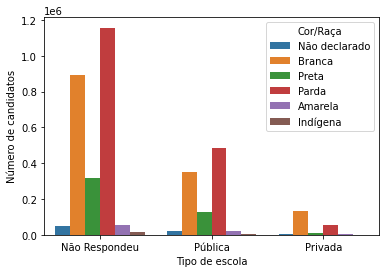

In [96]:
ax = sns.countplot(df_selecionada_sem_nulos['TP_ESCOLA'], hue = df_selecionada_sem_nulos['TP_COR_RACA'])
ax.set_xticklabels(dic_tp_escola_media.values())
ax.set_ylabel('Número de candidatos')
ax.set_xlabel('Tipo de escola')
plt.legend(title='Cor/Raça', loc='upper right', labels=dic_cor_raca.values())
plt.show()

Apesar da maioria dos participantes serem de escola pública, as maiores notas são de escolas privadas:

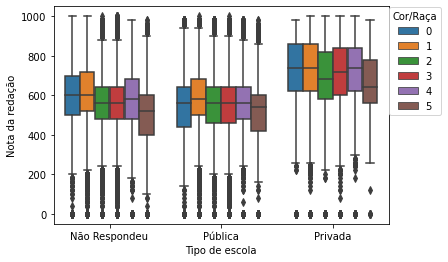

In [121]:
ax = sns.boxplot(x = df_selecionada_sem_nulos['TP_ESCOLA'], y = df_selecionada_sem_nulos['NU_NOTA_REDACAO'], hue = df_selecionada_sem_nulos['TP_COR_RACA'])
ax.set_xticklabels(dic_tp_escola_media.values())
ax.set_ylabel('Nota da redação')
ax.set_xlabel('Tipo de escola')
ax.legend(title='Cor/Raça', loc=[1,0.5])
plt.show()

Observa-se uma maior diferença entre o tipo de escola do que a cor do participante, pois dentro do mesmo grupo escolar a diferença de nota é reduzida entre os participantes, com uma leve vantagem da população branca sobre os outros grupos, e a população indígena possuindo maior desvantagem. Mas, o acesso a escolas privadas não é o mesmo para toda a população, conforme observado no gráfico countplot, onde a população preta era a maioria dos portipantes de escolas públicas, enquanto a população branca era a maioria em escolas privadas. Isso pode ser explicado por um recorte por renda média mensal de cada grupo social. 

Vamos analisar o recorte de cor pela renda mensal das famílias participantes do Enem 2019:

In [24]:
df_cor_raca = df_selecionada_sem_nulos.filter(['TP_COR_RACA', 'Q006', 'SG_UF_RESIDENCIA', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT'])

In [25]:
df_pop_branca = df_cor_raca[df_cor_raca.TP_COR_RACA.eq(1)]
df_pop_branca_qtde_renda = df_pop_branca.filter(['NU_NOTA_REDACAO','Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT']).groupby(['Q006']).count().filter(['NU_NOTA_REDACAO']).rename(columns = {'NU_NOTA_REDACAO': 'Nº DE PARTICIPANTES POR FAIXA DE RENDA'} , inplace = False)
df_pop_branca_total = df_pop_branca_qtde_renda['Nº DE PARTICIPANTES POR FAIXA DE RENDA'].sum()
df_pop_branca_qtde_renda['PORCENTAGEM (%)'] = df_pop_branca_qtde_renda.iloc[:, 0].values/df_pop_branca_total*100
#plt.bar(df_pop_branca_qtde_renda.index, df_pop_branca_qtde_renda['PORCENTAGEM (%)'])

In [26]:
df_pop_parda = df_cor_raca[df_cor_raca.TP_COR_RACA.eq(2)]
df_pop_parda_qtde_renda = df_pop_parda.filter(['NU_NOTA_REDACAO','Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT']).groupby(['Q006']).count().filter(['NU_NOTA_REDACAO']).rename(columns = {'NU_NOTA_REDACAO': 'Nº DE PARTICIPANTES POR FAIXA DE RENDA'} , inplace = False)
df_pop_parda_total = df_pop_parda_qtde_renda['Nº DE PARTICIPANTES POR FAIXA DE RENDA'].sum()
df_pop_parda_qtde_renda['PORCENTAGEM (%)'] = df_pop_parda_qtde_renda.iloc[:, 0].values/df_pop_parda_total*100
#df_pop_parda_qtde_renda.round(2)
#plt.bar(df_pop_parda_qtde_renda.index, df_pop_parda_qtde_renda['PORCENTAGEM (%)'])

In [27]:
df_pop_preta = df_cor_raca[df_cor_raca.TP_COR_RACA.eq(3)]
df_pop_preta_qtde_renda = df_pop_preta.filter(['NU_NOTA_REDACAO','Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT']).groupby(['Q006']).count().filter(['NU_NOTA_REDACAO']).rename(columns = {'NU_NOTA_REDACAO': 'Nº DE PARTICIPANTES POR FAIXA DE RENDA'} , inplace = False)
df_pop_preta_total = df_pop_preta_qtde_renda['Nº DE PARTICIPANTES POR FAIXA DE RENDA'].sum()
df_pop_preta_qtde_renda['PORCENTAGEM (%)'] = df_pop_preta_qtde_renda.iloc[:, 0].values/df_pop_preta_total*100
#df_pop_preta_qtde_renda.round(2)
#plt.bar(df_pop_preta_qtde_renda.index, df_pop_preta_qtde_renda['PORCENTAGEM (%)'])

In [28]:
df_pop_amarela = df_cor_raca[df_cor_raca.TP_COR_RACA.eq(4)]
df_pop_amarela_qtde_renda = df_pop_amarela.filter(['NU_NOTA_REDACAO','Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT']).groupby(['Q006']).count().filter(['NU_NOTA_REDACAO']).rename(columns = {'NU_NOTA_REDACAO': 'Nº DE PARTICIPANTES POR FAIXA DE RENDA'} , inplace = False)
df_pop_amarela_total = df_pop_amarela_qtde_renda['Nº DE PARTICIPANTES POR FAIXA DE RENDA'].sum()
df_pop_amarela_qtde_renda['PORCENTAGEM (%)'] = df_pop_amarela_qtde_renda.iloc[:, 0].values/df_pop_amarela_total*100
#df_pop_amarela_qtde_renda.round(2)
#plt.bar(df_pop_amarela_qtde_renda.index, df_pop_amarela_qtde_renda['PORCENTAGEM (%)'])

In [29]:
df_pop_indigena = df_cor_raca[df_cor_raca.TP_COR_RACA.eq(5)]
df_pop_indigena_qtde_renda = df_pop_indigena.filter(['NU_NOTA_REDACAO','Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT']).groupby(['Q006']).count().filter(['NU_NOTA_REDACAO']).rename(columns = {'NU_NOTA_REDACAO': 'Nº DE PARTICIPANTES POR FAIXA DE RENDA'} , inplace = False)
df_pop_indigena_total = df_pop_indigena_qtde_renda['Nº DE PARTICIPANTES POR FAIXA DE RENDA'].sum()
df_pop_indigena_qtde_renda['PORCENTAGEM (%)'] = df_pop_indigena_qtde_renda.iloc[:, 0].values/df_pop_indigena_total*100
#df_pop_indigena_qtde_renda.round(2)
#plt.bar(df_pop_indigena_qtde_renda.index, df_pop_indigena_qtde_renda['PORCENTAGEM (%)'])

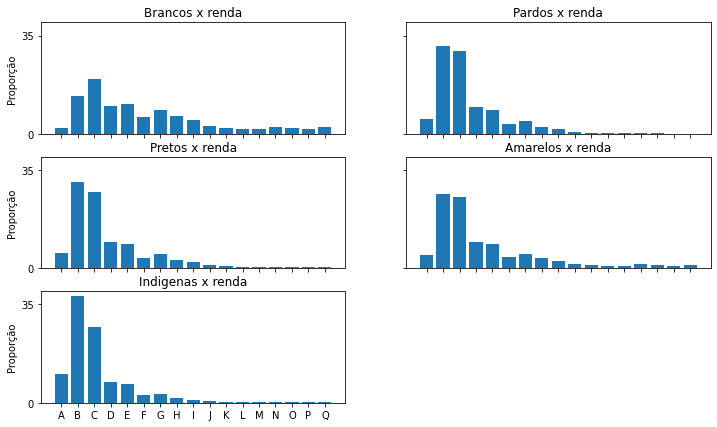

In [128]:
fig1, axs1 = plt.subplots(3, 2, sharex = True, sharey = True , figsize = (12,7))
axs1[0,0].set_ylabel('Proporção')
axs1[0, 0].bar(df_pop_branca_qtde_renda.index, df_pop_branca_qtde_renda['PORCENTAGEM (%)'])
axs1[0, 0].set_yticks([0, 35])
axs1[0, 0].set_title('Brancos x renda')
axs1[0, 1].bar(df_pop_parda_qtde_renda.index, df_pop_parda_qtde_renda['PORCENTAGEM (%)'])
axs1[0, 1].set_title('Pardos x renda')
axs1[1, 0].bar(df_pop_preta_qtde_renda.index, df_pop_preta_qtde_renda['PORCENTAGEM (%)'])
axs1[1,0].set_ylabel('Proporção')
axs1[1, 0].set_title('Pretos x renda')
axs1[1, 1].bar(df_pop_amarela_qtde_renda.index, df_pop_amarela_qtde_renda['PORCENTAGEM (%)'])
axs1[1, 1].set_title('Amarelos x renda')
axs1[2, 0].bar(df_pop_indigena_qtde_renda.index, df_pop_indigena_qtde_renda['PORCENTAGEM (%)'])
axs1[2,0].set_ylabel('Proporção')
axs1[2, 0].set_title('Indigenas x renda')
fig1.delaxes(axs1[2,1])

A população branca possui, em média, maior renda que todos os outros grupos sociais participantes do Enem.

Com maiores condições financeiras para auxiliar no processo de educação dos estudantes, espera-se que a população branca consiga em média notas maiores do que os outras populações participantes do Enem:

In [31]:
df_cor_raca_media

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
TP_COR_RACA,,,,,
0,576.641656,486.750044,518.643056,527.393251,533.208767
1,615.727092,499.356627,532.114560,540.313060,556.033125
2,550.604978,461.098293,495.095292,510.836500,493.848899
3,559.689971,465.014848,496.166209,511.277990,504.422063
4,576.818595,477.392672,505.150075,520.361655,525.601454
5,499.717511,444.201714,470.863198,487.460470,475.771904


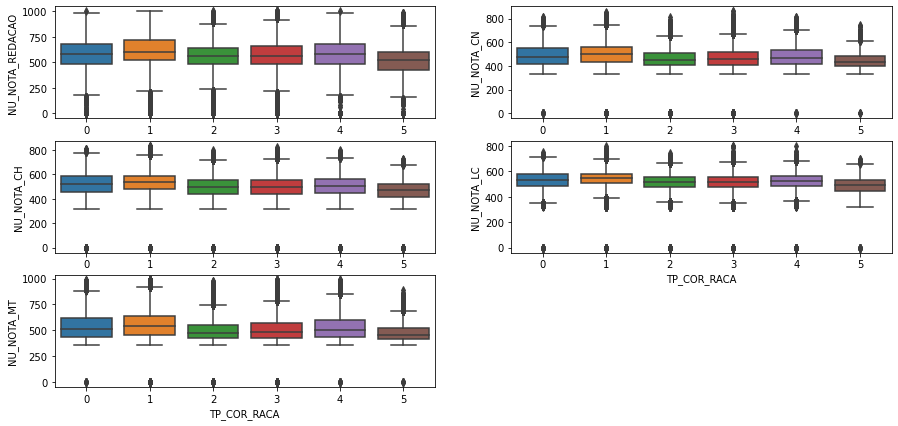

In [93]:
fig2, axes2 = plt.subplots(3, 2, figsize=(15,7))

sns.boxplot(ax=axes2[0, 0], data=df_selecionada_sem_nulos, x='TP_COR_RACA', y='NU_NOTA_REDACAO')
sns.boxplot(ax=axes2[0, 1], data=df_selecionada_sem_nulos, x='TP_COR_RACA', y='NU_NOTA_CN')
sns.boxplot(ax=axes2[1, 0], data=df_selecionada_sem_nulos, x='TP_COR_RACA', y='NU_NOTA_CH')
sns.boxplot(ax=axes2[1, 1], data=df_selecionada_sem_nulos, x='TP_COR_RACA', y='NU_NOTA_LC')
sns.boxplot(ax=axes2[2, 0], data=df_selecionada_sem_nulos, x='TP_COR_RACA', y='NU_NOTA_MT')
fig2.delaxes(axes2[2,1])

Nota-se uma leve vantagem da população branca nas provas objetivas, e expressiva vantagem na prova de redação. O único grupo social que mais se aproxima da nota média da população branca são os participantes autodeclarados amarelos. Além disso, destaca-se a nota média da população indígena, bastante inferior aos outros grupos em todas as provas aplicadas.

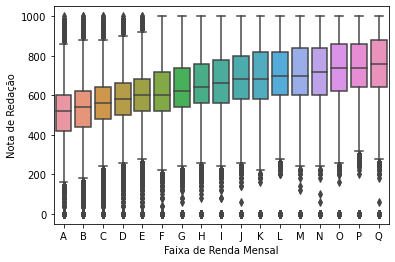

In [41]:
sns.boxplot(x = df_selecionada_sem_nulos['Q006'], y = df_selecionada_sem_nulos['NU_NOTA_REDACAO'], order = dic_renda_media)
plt.xlabel("Faixa de Renda Mensal")
plt.ylabel("Nota de Redação")
plt.show()

Observando o gráfico da nota de redação pela renda média do participante, observa-se praticamente uma relação linear. Ou seja, quanto maior a renda, maior a nota obtida.